# Group 5
## Assignment 2: Problem 2

1. Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all
the points in the training set as centers of the RB functions. Compare the performance results (mean square
error) as you vary the spread parameter while keeping it the same for all kernel functions. Discuss your findings.
2. Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches:
a) Randomly select the centers from the input data.
b) Use K-Means algorithm to find the centers. You can use a Kmeans function defined in sklearn (https://scikitlearn.org/stable/modules/generated/sklearn.cluster.KMeans.html) or create your own.
Keep the spread parameter fix for all kernel functions. Compare the performance of this network to the one designed in
part (1)

### Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Create Data

### Create training set of 441 randomly sampled data points

In [2]:
points = list()
for i in range(0, 21):
    for j in range(0, 21):
        xi = -2 + (0.2 * i)
        xj = -2 + (0.2 * j)
        points.append([xi, xj])
print(len(points))

441


### Randomly Shuffling all the 441 points

In [3]:
np.random.seed(2)
np.random.shuffle(points)

### Generate Labels

In [4]:
labled_points = list()
for i in points:
    ans = (i[0] * i[0] + i[1] * i[1])
    if ans <= 1:
        labled_points.append([i[0], i[1], 1])
    else:
        labled_points.append([i[0], i[1], -1])


labled_points = np.array(labled_points)
labled_points.shape

(441, 3)

### Plot the generated points

Text(0.5, 1.0, 'Scatter Plot of 441 randomly generated points.')

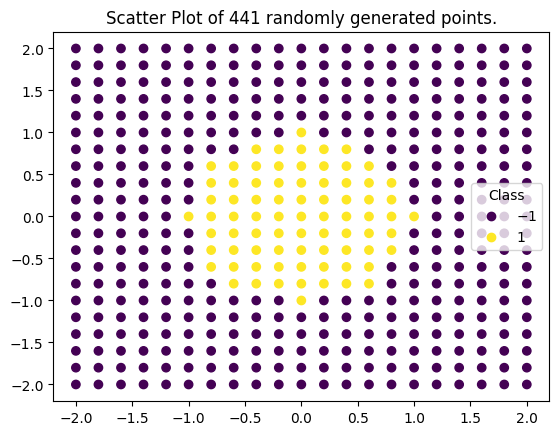

In [5]:
p = plt.scatter(labled_points[:, 0], labled_points[:, 1], c = labled_points[:, 2])
plt.legend(*p.legend_elements(prop = 'colors'), loc="best", title="Class")
plt.title("Scatter Plot of 441 randomly generated points.")

### Split Data into 80% train and 20% test data

In [6]:
train = labled_points[:353]
test = labled_points[353:]
print("Length of Complete Data Set: ", len(labled_points))
print("Length of Train Data Set: " ,  len(train))
print("Length of Test Data Set: " , len(test))

Length of Complete Data Set:  441
Length of Train Data Set:  353
Length of Test Data Set:  88


### Separating features and labels from train and test data

In [7]:
X_train = train[:, :2]
print(X_train.shape)

y_train = train[:, 2:]
print(y_train.shape)


(353, 2)
(353, 1)


In [8]:
X_test = test[:, :2]
print(X_test.shape)
y_test = test[:, 2:]
print(y_test.shape)


(88, 2)
(88, 1)


### Helper Functions

In [9]:
#Euclidian Distance
def euc_dist(x1, x2):
    return sum([(a - b) ** 2 for a, b in zip(x1, x2)])

#Gaussian Value
def gaussian(distance, sig):
    return math.exp((-1) * (distance) / ((2) * (sig ** 2)))

# Gaussian Kernel
def GaussianKernel(data, centers, sig):
    g = np.zeros((len(data), len(centers)))
    for i in range(len(data)):
        for j in range(len(centers)):
            g[i][j] = gaussian(euc_dist(data[i], centers[j]), sig)
    return g

#Mean Square Error
def mse(y_actual, y_prediction):
    err = 0
    for i in range(len(y_actual)):
        err = err + ((y_actual[i] - y_prediction[i]) ** 2)
    return err / len(y_actual)

#Accuracy
def accuracy(actual, prediction):
    count = 0
    n = len(actual)
    if n == 0:
        return 0
    for i in range(n):
        if (actual[i] == 1 and prediction[i] >= 0) or (actual[i] == -1 and prediction[i] < 0):
            count = count + 1
    return (count / n)

#### Training RBF

In [10]:
def fit(data, centers, test, sigma_list):
    train_error = list()
    train_accuracy = list()
    test_error = list()
    test_accuracy = list()
    result_dict = dict()
    for sig in sigma_list:
        G_train = GaussianKernel(data, centers, sig)

        #G_inv = np.linalg.pinv(G_train)
        #W = G_inv.dot(y_train)

        # Calculating Weights
        W = np.linalg.pinv(G_train.T @ G_train) @ G_train.T @ y_train

        # Predicting on the training data.
        y_pred_train = G_train.dot(W)

        # Predicting on the test data.
        G_test = GaussianKernel(test, centers, sig)
        y_pred_test = G_test.dot(W)

        # Calculating errors and accuracy for both training and testing results.
        e_train = mse(y_train, y_pred_train)
        train_error.append(e_train)

        a_train = accuracy(y_train, y_pred_train)
        train_accuracy.append(a_train)

        e_test = mse(y_test, y_pred_test)
        test_error.append(e_test)

        a_test = accuracy(y_test, y_pred_test)
        test_accuracy.append(a_test)

    result_dict = {"sigma":sigma_list,"train_error" : train_error,"train_accuracy" : train_accuracy,"test_error" : test_error,"test_accuracy"  : test_accuracy}
    result_df = pd.DataFrame.from_dict(result_dict)
    return result_df


#### Generate Plot

In [11]:
def plot(df,plot_type,title):
    if plot_type == "Accuracy":
        plt.plot(df.sigma, df.train_accuracy * 100, label = "Train Accuracy")
        plt.plot(df.sigma, df.test_accuracy * 100, label = "Test Accuracy")
    else :
        plt.plot(df.sigma, df.train_error * 100, label = "Train Error")
        plt.plot(df.sigma, df.test_error * 100, label = "Test Error")
    plt.title(title)
    plt.xlabel("Spread Parameter (sigma)")
    plt.ylabel(plot_type + " (%)")
    plt.legend()
    plt.show()


###  1) Using all the points in the Training Set as Centers

In [12]:
sigma = [0.01, 0.05, 0.1, 0.2, 0.3,0.4, 0.5, 0.75, 1, 2, 3, 4, 5, 7, 10, 12, 15, 20]

In [13]:
df = fit(X_train, X_train, X_test, sigma)
df

,sigma,train_error,train_accuracy,test_error,test_accuracy
0,0.01,[9.458858472703607e-31],1.000000,[1.0],0.943182
1,0.05,[4.776847486585963e-30],1.000000,[0.9982328712127359],0.943182
2,0.10,[7.671141554081734e-30],1.000000,[0.5004530988313944],0.943182
3,0.20,[1.600190568285091e-23],1.000000,[0.23607515838478638],0.909091
4,0.30,[4.289328601145046e-12],1.000000,[0.7135625350140412],0.863636
5,0.40,[0.006509497841080674],1.000000,[0.8076119339767385],0.897727
6,0.50,[0.025709403370897447],1.000000,[0.2830231649483844],0.920455
7,0.75,[0.05383102116163909],0.994334,[0.13810228910365233],0.965909
8,1.00,[0.06376198152683218],0.991501,[0.09958569635801048],0.988636
9,2.00,[0.11113792090692831],0.980170,[0.1217177720600669],0.988636


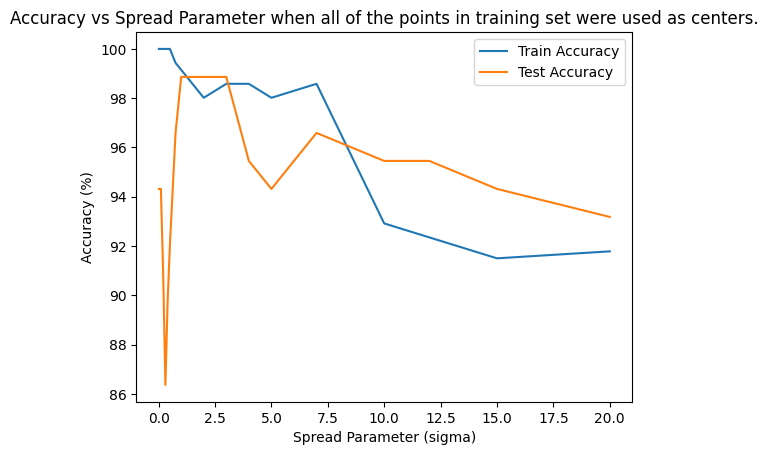

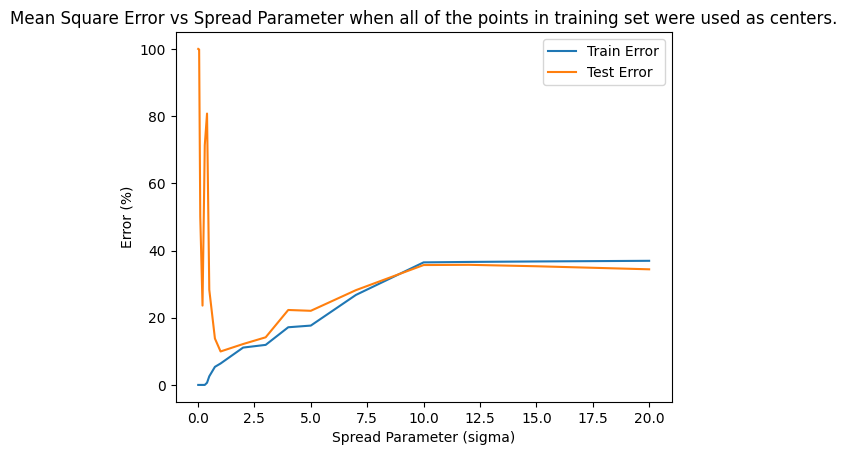

In [14]:
plot(df, plot_type = "Accuracy", title = "Accuracy vs Spread Parameter when all of the points in training set were used as centers.")

plot(df, plot_type = "Error", title = "Mean Square Error vs Spread Parameter when all of the points in training set were used as centers.")


We chose following different value of spread parameter : 0.01, 0.05, 0.1, 0.2, 0.3,0.4, 0.5, 0.75, 1, 2, 3, 4, 5, 7, 10, 12, 15, 20.

+ When the spread parameter value is too small , train accuracy is almost 100 %. This is due to the limited size of our data collection, which consists of 441 points, all of which are utilised as centers in the training set (i.e., 80% of the points).The decision boundary is more rigid and overfitting when the sigma value is low. Sigma plays role of an amplifier of the distance between two points. The kernel function is prone to being zero if the distance between the points is significantly greater than sigma. When the sigma is very small, only the points within the certain distance can affect the predicting point.


+ When the radial functions' ranges are farther from the function's original range, more information is lost as the spread parameter's value increases. When the sigma is larger, the decision is more likely to be flexible and smooth and to classify the data incorrectly while making predictions. This is the reason why test accuracy is dropping for large value of sigma.


+ A medium width value yields better results, and RBF's approximation of the curve is rather accurate. When a data point is towards the centre of the kernel function, it is less sensitive. Because of this, the network appears to generalize for medium values of sigma. Thus, even if training accuracy somewhat declines, test accuracy rises and reaches its maximum for sigma values of 3. This specific width setting appears to provide the network the necessary interpolation feature.


In [15]:
df = fit(X_train, X_train, X_test, [3])
df

,sigma,train_error,train_accuracy,test_error,test_accuracy
0,3,[0.119187372539474],0.985836,[0.1417397462129702],0.988636


Because of this reason, we choose a value of spread parameter 3 which is neither too high, nor too low and is giving a train accuracy of - <b>98.58%</b> and test accuracy of - <b>98.86%</b>

### 2a) Using randomly 150 points from the dataset.

In [16]:
np.random.seed(15)
centers = np.copy(train)
np.random.shuffle(centers)
centers_shuffled = centers[:150]
print(centers.shape, centers_shuffled.shape)

(353, 3) (150, 3)


In [17]:
X_random = centers_shuffled[:, :2]
print(X_random.shape)

(150, 2)


In [18]:
df = fit(X_train, X_random, X_test, [3])
df

,sigma,train_error,train_accuracy,test_error,test_accuracy
0,3,[0.1190371727322319],0.985836,[0.14175158705820848],0.988636


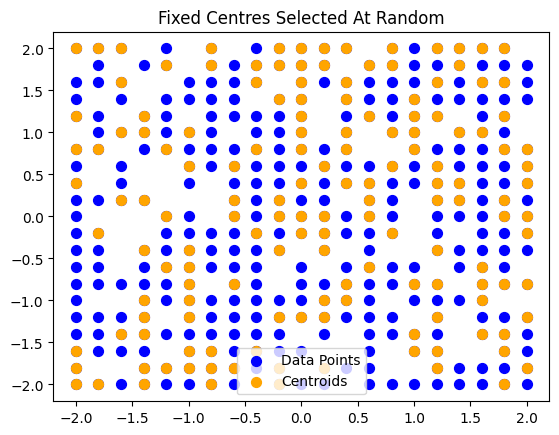

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=50,c="blue", label ='Data Points')
plt.scatter(X_random[:, 0], X_random[:, 1], s=50,c="orange",label ='Centroids')
plt.title('Fixed Centres Selected At Random')
plt.legend()
plt.show()

The performance is similar to as observed in part 1.We are getting a train accuracy of - <b>98.58%</b> and test accuracy of - <b>98.86%</b>

Since our data set is small and condensed and the network has a large number of neurons in the hidden layer,  accuracy is not further improving and we always obtain exactly the desired output for the chosen value of sigma.

### 2b) Using KMeans clustering to get 150 centroids.

In [20]:
clf = KMeans(n_clusters = 150, random_state = 0)
clf.fit(X_train)
X_center = clf.cluster_centers_
print(X_center.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(150, 2)


In [21]:
df = fit(X_train, X_center, X_test, [3])
df

,sigma,train_error,train_accuracy,test_error,test_accuracy
0,3,[0.11913826720694862],0.985836,[0.14206155354187044],0.988636


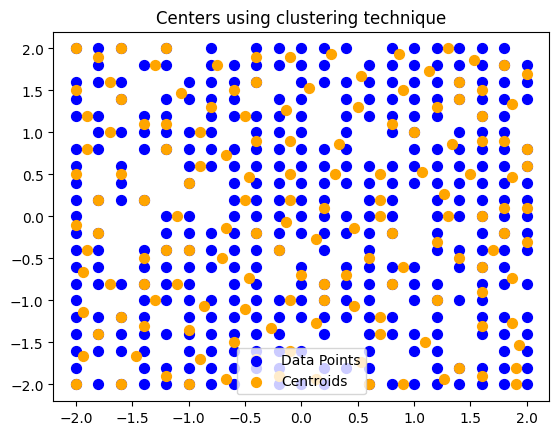

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=50 ,c="blue", label ='Data Points')
plt.scatter(X_center[:, 0], X_center[:, 1], s=50 ,c="orange", label ='Centroids')
plt.title('Centers using clustering technique')
plt.legend()
plt.show()

In this section, we established the proper centres using the Kmeans clustering technique because random selection does not always result in centers that suit the training samples well enough to produce results that are approximatively accurate. However, the performance in this instance is also comparable to that shown in Part 1. Our test accuracy is 98.86%, and our train accuracy is -98.58%.

This might be the case since the data set is limited, and accuracy is not increasing even when the neurons in the hidden layer are reduced.


### Visualizing the effect of the non-linear function on the data

From the below plots we can see that the RBF network performs a non-linear transformation on the given data and transforms the data from two dimensions to a higher dimension.

1. When all the points are selected as centres for lower values of sigma we can see a distinct separation between the two classes. Even though it looks like the classification has happened perfectly we observe above that the testing accuracy for this model is poor. This is mainly happening because of overfitting at the boundaries of the classes.   

2. When centres are selected at random the lower values tend to create a lot of local cluseters within one class. As we can see in the image with sigma=0.01 it appears as if there are 3 classes in the dataset. Similarly a larger value of sigma like sigma=20 increase the effect of one region on an unrelated region. This creates the smooth curve we see becausse of which linear classification becomes difficult. Therefore a middle value depending on the dataset is selected. Hence the ideal value for sigma for the given dataset is 3 as observed from the testing and training data and also from the visualisation.

3. Similarly for the centres selected through k-means middle values of sigma perform better than the extremes. The results from k-means are similar to the random centres selected for this dataset as the points are spread out equally and arranged well in a grid format. When we plot the centres of k-means on the actual dataset they appear a little offset from the original data point. Hence making the centres almost similar to randomly selecting data points as centres.



In [23]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


#### All the points in the Training Set as Centers

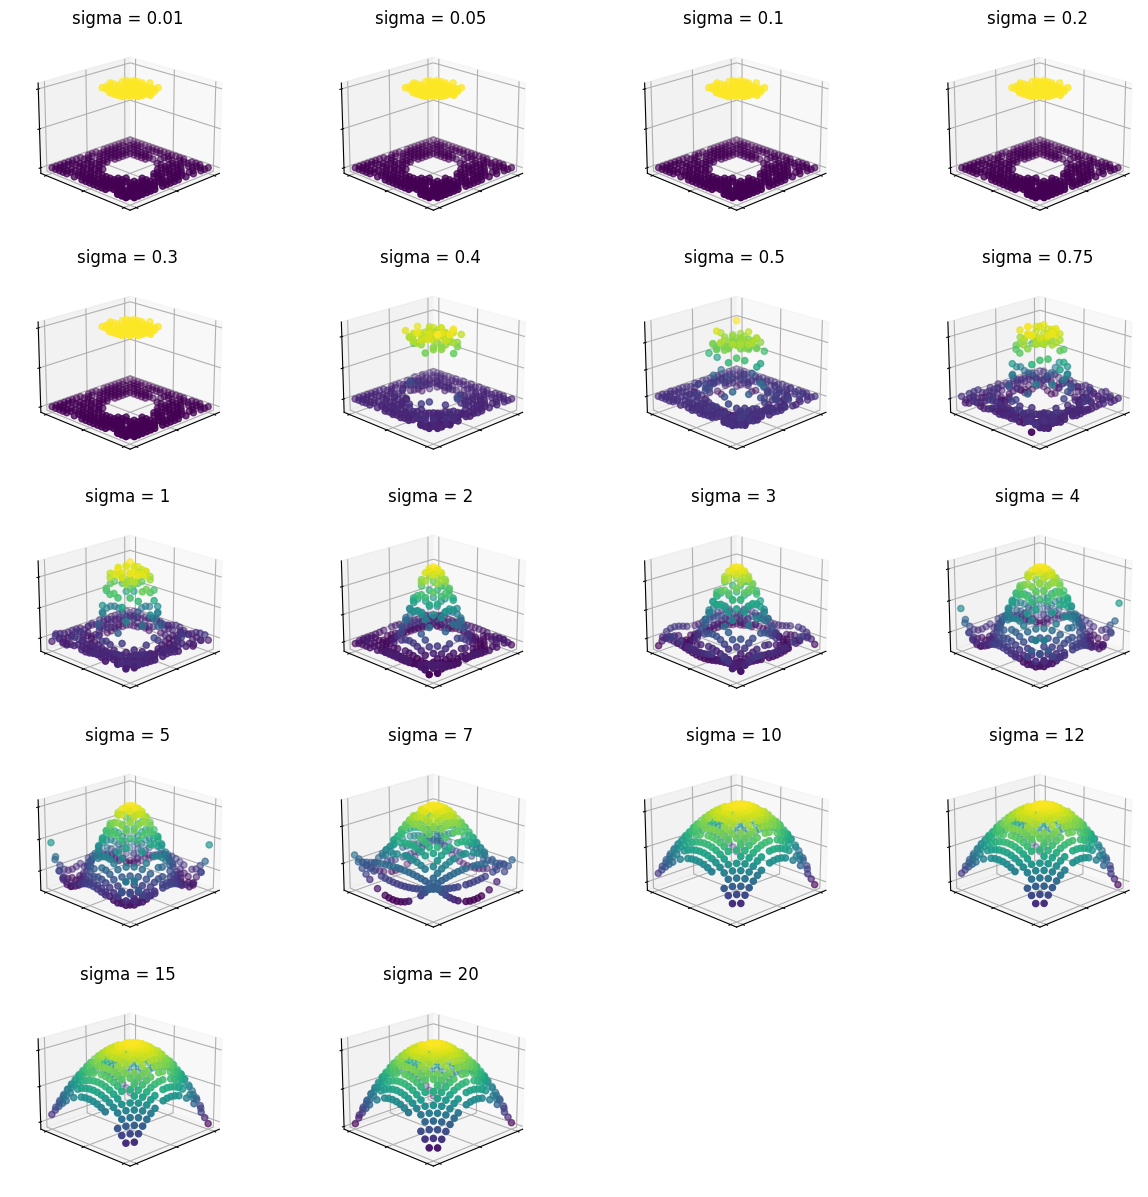

In [24]:
x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.2)


for i, sig in enumerate(sigma):
    G_train = GaussianKernel(X_train, X_train, sig)
    #G_inv = np.linalg.pinv(G_train)
    #W = G_inv.dot(y_train)

    # Calculating Weights
    W = np.linalg.pinv(G_train.T @ G_train) @ G_train.T @ y_train

    # Predicting on the training data.
    Z = G_train.dot(W)
    Z = np.squeeze(Z)

    ax = fig.add_subplot(5, 4, i+1, projection='3d')
    ax.scatter3D(x, y, Z, c=Z, cmap='viridis')
    ax.view_init(azim=45, elev=20)
    ax.set_title("sigma = "+str(sig))
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])



#### Random 150 Clusters

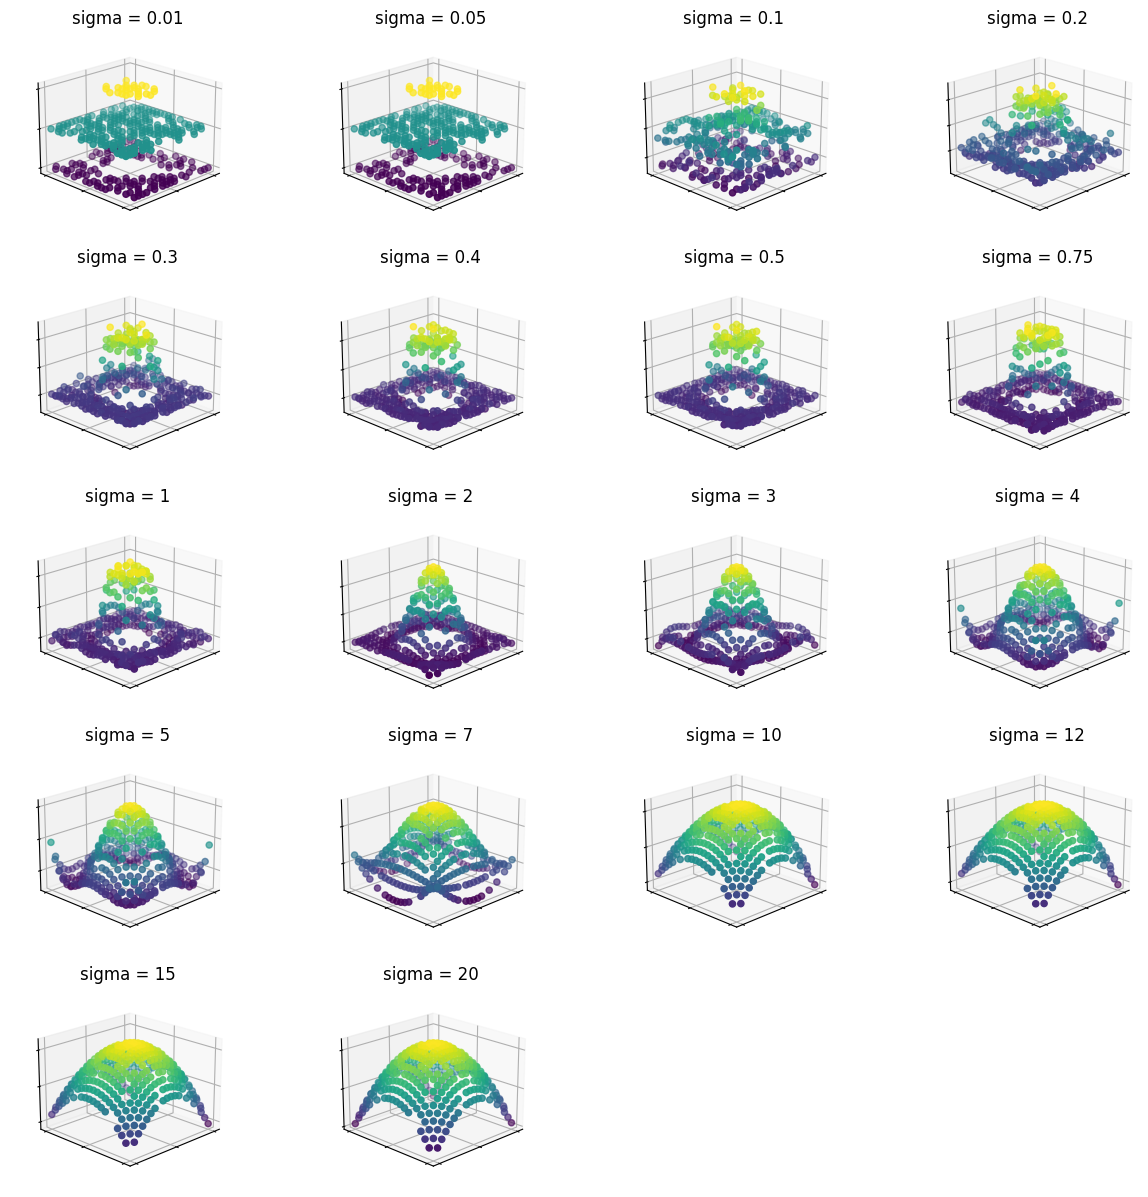

In [25]:


x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.2)


for i, sig in enumerate(sigma):
    G_train = GaussianKernel(X_train, X_random, sig)
    #G_inv = np.linalg.pinv(G_train)
    #W = G_inv.dot(y_train)

    # Calculating Weights
    W = np.linalg.pinv(G_train.T @ G_train) @ G_train.T @ y_train

    # Predicting on the training data.
    Z = G_train.dot(W)
    Z = np.squeeze(Z)

    ax = fig.add_subplot(5, 4, i+1, projection='3d')
    ax.scatter3D(x, y, Z, c=Z, cmap='viridis')
    ax.view_init(azim=45, elev=20)
    ax.set_title("sigma = "+str(sig))
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])



#### Kmeans 150 Clusters


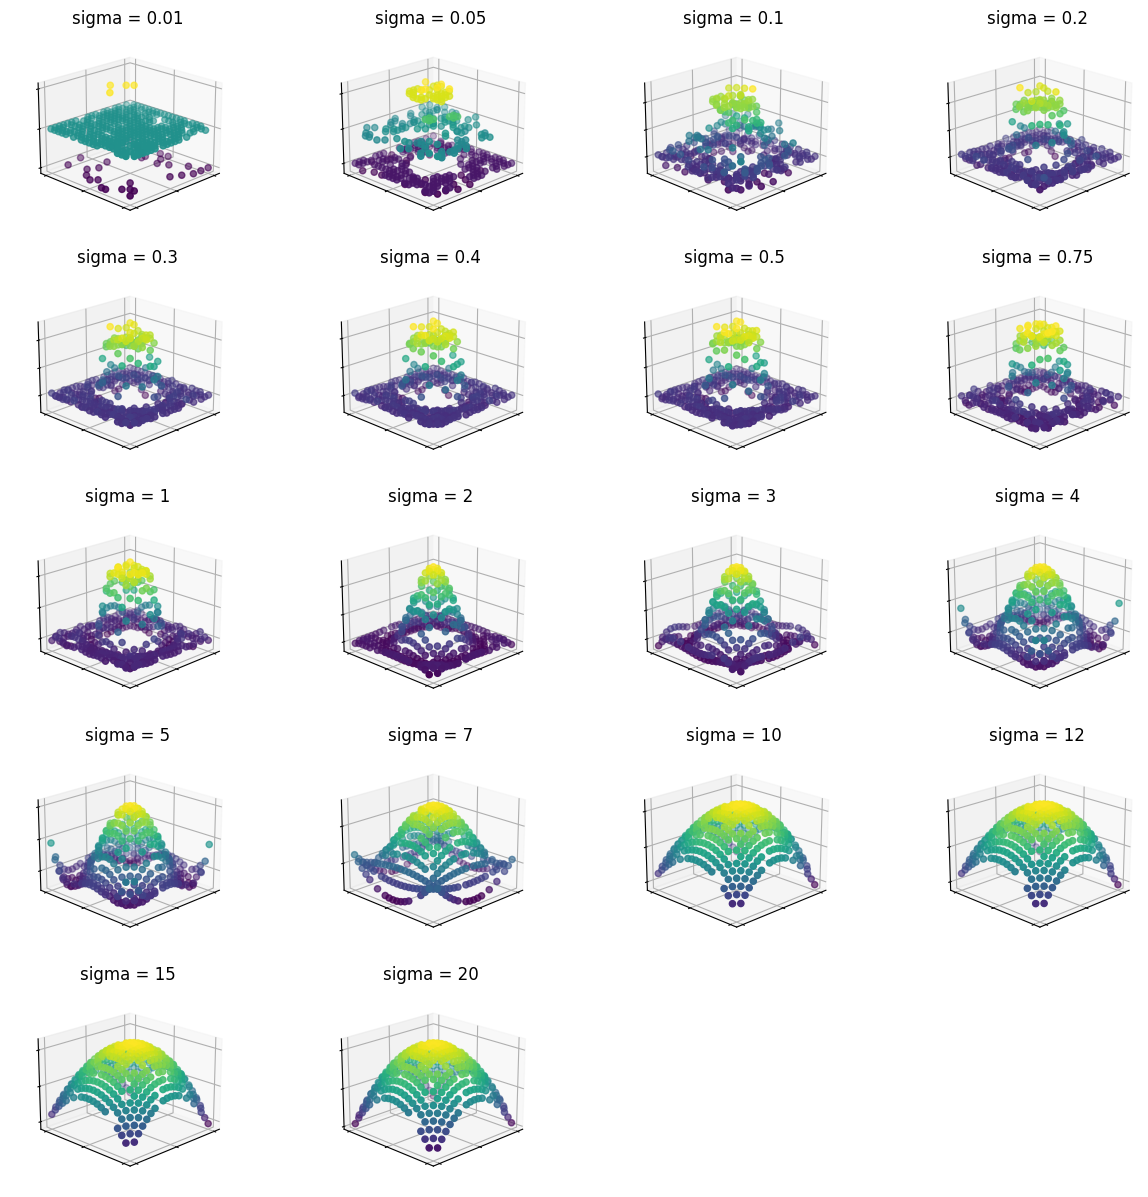

In [26]:

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.2)


for i, sig in enumerate(sigma):
    G_train = GaussianKernel(X_train, X_center, sig)
    #G_inv = np.linalg.pinv(G_train)
    #W = G_inv.dot(y_train)

    # Calculating Weights
    W = np.linalg.pinv(G_train.T @ G_train) @ G_train.T @ y_train

    # Predicting on the training data.
    Z = G_train.dot(W)
    Z = np.squeeze(Z)

    ax = fig.add_subplot(5, 4, i+1, projection='3d')
    ax.scatter3D(x, y, Z, c=Z, cmap='viridis')
    ax.view_init(azim=45, elev=20)
    ax.set_title("sigma = "+str(sig))
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])

